# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import trange
%matplotlib inline

import sys
sys.path.append('C:\\Users\\lucai\\nuvPriors_repo\\nuvPriors')
from src.models.modelSelector import ModelSelector

# 1-Dimensional Case    

## Data Generation

Text(0.5, 0.98, 'Generated Observations')

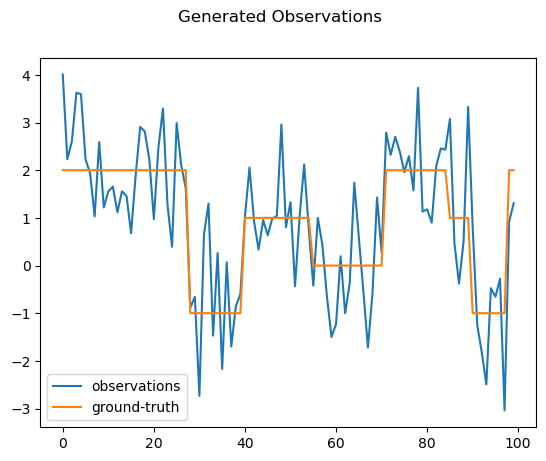

In [2]:
# Specify parameters
N = 100
M = 4
D = 1
varNoise = 1.0
seed = 0
np.random.seed(seed)

# Specify levels and array with level indices
levels = np.array([[-1.0], [0.0], [1.0], [2.0]])
selectedLevels = np.zeros(N, dtype=int)
ind_start = 0
while ind_start < N:
    ind_stop = ind_start + np.random.randint(low=int(N/20), high=int(N/10))
    selectedLevels[ind_start:ind_stop] = np.random.randint(low=0, high=M)
    ind_start = ind_stop
    
# Calculate X and Y
x = np.array([levels[selectedLevel_i] for selectedLevel_i in selectedLevels])
y = np.random.normal(x,varNoise)

# Plot data
fig1, axs1 = plt.subplots()
axs1.plot(y, label='observations')
axs1.plot(x, label='ground-truth')
axs1.legend()
fig1.suptitle('Generated Observations')

## Estimation

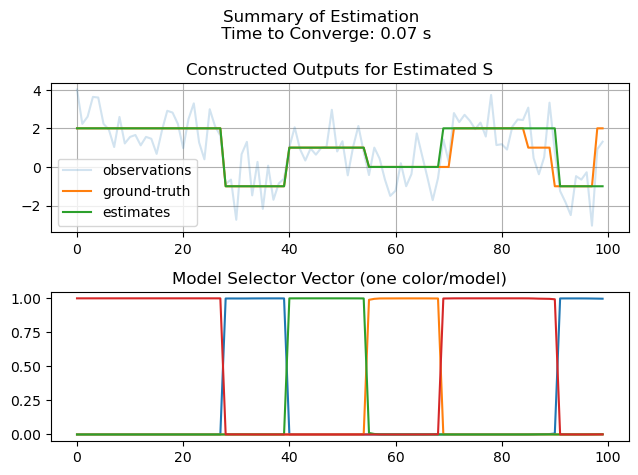

In [3]:
# Construct known sigmas and model outputs
sigmas = np.tile(np.identity(D, dtype=float), (M,1,1))
x_perModel = np.tile(levels, (N,1,1))

########################################################################################################################

# Initialize estimator
modelSelector = ModelSelector(N=N, M=M, sigmas=sigmas)

# Do estimation
start_time = time.time()
_, i_it = modelSelector.estimate_selectedModel(y=y, x_perModel=x_perModel)
stop_time = time.time()
conv_time = stop_time - start_time

########################################################################################################################

# Get S and construct X_hat
ms_hat,_ = modelSelector.get_sHat()
selectedModel = np.argmax(ms_hat, axis=1)
x_hat = np.array([levels[selectedModel_i] for selectedModel_i in selectedModel])

# Plot estimations
fig2, axs2 = plt.subplots(2,1)

axs2[0].plot(y[:,0], alpha=0.2, label='observations')
axs2[0].plot(x[:,0], label='ground-truth')
axs2[0].plot(x_hat[:,0], label='estimates')
axs2[0].legend()
axs2[0].grid()
axs2[0].set_title('Constructed Outputs for Estimated S')

axs2[1].plot(ms_hat)
axs2[1].set_title('Model Selector Vector (one color/model)')

fig2.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig2.tight_layout()

# 3-Dimensional Case

## Data Generation

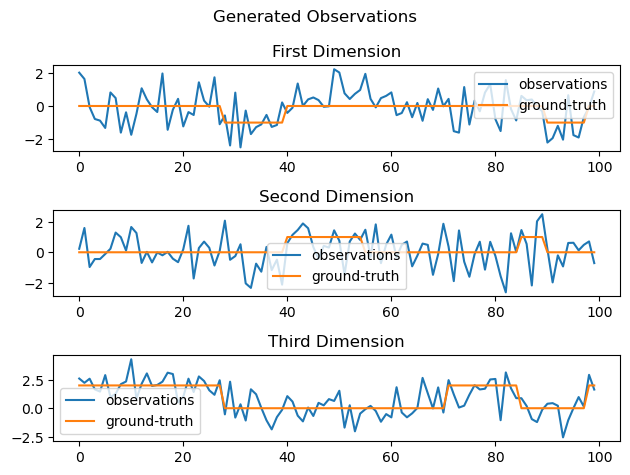

In [4]:
# Specify parameters
N = 100
M = 4
D = 3
varNoise = 1.0
seed = 0
np.random.seed(seed)

# Specify levels and array with level indices
levels = np.array([[-1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 2.0]])
selectedLevels = np.zeros(N, dtype=int)
ind_start = 0
while ind_start < N:
    ind_stop = ind_start + np.random.randint(low=int(N/20), high=int(N/10))
    selectedLevels[ind_start:ind_stop] = np.random.randint(low=0, high=M)
    ind_start = ind_stop
    
# Calculate X and Y
x = np.array([levels[selectedLevel_i] for selectedLevel_i in selectedLevels])
y = np.random.normal(x,varNoise)

# Plot data
fig3, axs3 = plt.subplots(3,1)

axs3[0].plot(y[:,0], label='observations')
axs3[0].plot(x[:,0], label='ground-truth')
axs3[0].legend()
axs3[0].set_title('First Dimension')

axs3[1].plot(y[:,1], label='observations')
axs3[1].plot(x[:,1], label='ground-truth')
axs3[1].legend()
axs3[1].set_title('Second Dimension')

axs3[2].plot(y[:,2], label='observations')
axs3[2].plot(x[:,2], label='ground-truth')
axs3[2].legend()
axs3[2].set_title('Third Dimension')

fig3.suptitle('Generated Observations')
fig3.tight_layout()

## Estimation

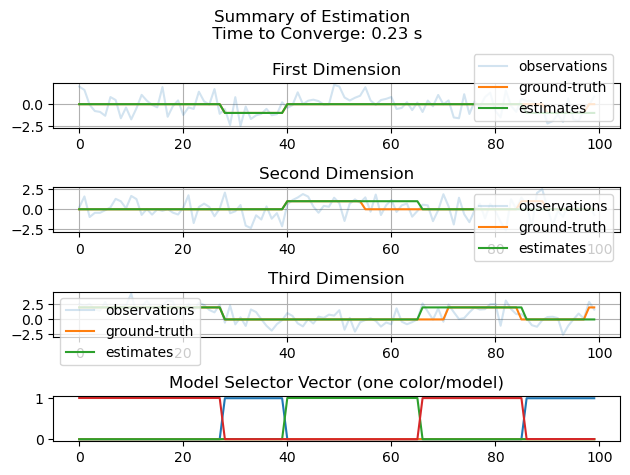

In [5]:
# Construct known sigmas and model outputs
sigmas = np.tile(np.identity(D, dtype=float), (M,1,1))
x_perModel = np.tile(levels, (N,1,1))

########################################################################################################################

# Initialize estimator
modelSelector = ModelSelector(N=N, M=M, sigmas=sigmas)

# Do estimation
start_time = time.time()
_, i_it = modelSelector.estimate_selectedModel(y=y, x_perModel=x_perModel)
stop_time = time.time()
conv_time = stop_time - start_time

########################################################################################################################

# Get S and construct X_hat
ms_hat,_ = modelSelector.get_sHat()
selectedModel = np.argmax(ms_hat, axis=1)
x_hat = np.array([levels[selectedModel_i] for selectedModel_i in selectedModel])

# Plot estimations
fig4, axs4 = plt.subplots(4,1)

axs4[0].plot(y[:,0], alpha=0.2, label='observations')
axs4[0].plot(x[:,0], label='ground-truth')
axs4[0].plot(x_hat[:,0], label='estimates')
axs4[0].legend()
axs4[0].grid()
axs4[0].set_title('First Dimension')

axs4[1].plot(y[:,1], alpha=0.2, label='observations')
axs4[1].plot(x[:,1], label='ground-truth')
axs4[1].plot(x_hat[:,1], label='estimates')
axs4[1].legend()
axs4[1].grid()
axs4[1].set_title('Second Dimension')

axs4[2].plot(y[:,2], alpha=0.2, label='observations')
axs4[2].plot(x[:,2], label='ground-truth')
axs4[2].plot(x_hat[:,2], label='estimates')
axs4[2].legend()
axs4[2].grid()
axs4[2].set_title('Third Dimension')

axs4[3].plot(ms_hat)
axs4[3].set_title('Model Selector Vector (one color/model)')

fig4.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig4.tight_layout()